In [1]:
# Importation of python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

In [2]:
# utilisation of pandas to read the data set
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


<hr>

Upon initially viewing the contents of the dataframe i.e. the csv file. One may assume that an error has occured throughout the process of reading the dataframe. Such inferences may be assumed due to the contents of the dataframe expressing null values for the dependent variable of power. Depicted by the initial summary of the dataset, no change in power is conveyed when the variable of speed ranges from 0 to 25. Under such an assumption the dataset heeds further inspection.

Exploration of the dataset

As addressed above, our initial read of the dataset provided no insights related to the variable power. Further insepction of the dataset will occur in order to validate or contradict our initial assumption.

In [3]:
df.head(21)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


Further insight into the dataset, may express the following suggestion that in order for any power to be generated the speed variable must reach a value of .3 or greater. As prior to this speed, no power was said to be generated or recorded within the dataset.

In [4]:
df.tail(20)

,speed,power
480,23.974,94.270
481,24.024,105.992
482,24.049,93.524
483,24.174,95.869
484,24.199,101.419
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117


The above code expresses a facet of the dataset, suggesting that when the independent variable of speed reaches a value greater than that of 24.4 the dependent variable of power is expressed as 0 i.e. no power is said to be generated or is recorded.

<hr>

Based on the insights gained through our initial inspection of the dataset, it is suggested that when depicting the dataset in the form of a plot. Several values of the dependant variable power will display a value of zero, this will occur at both the start and end of the plot. 

In [5]:
# Displays plots in a greater size, improving legibility
plt.rcParams['figure.figsize'] = (20, 10)

In [6]:
powerzerostart = df[0:5]
powerzeroend = df[490:499]

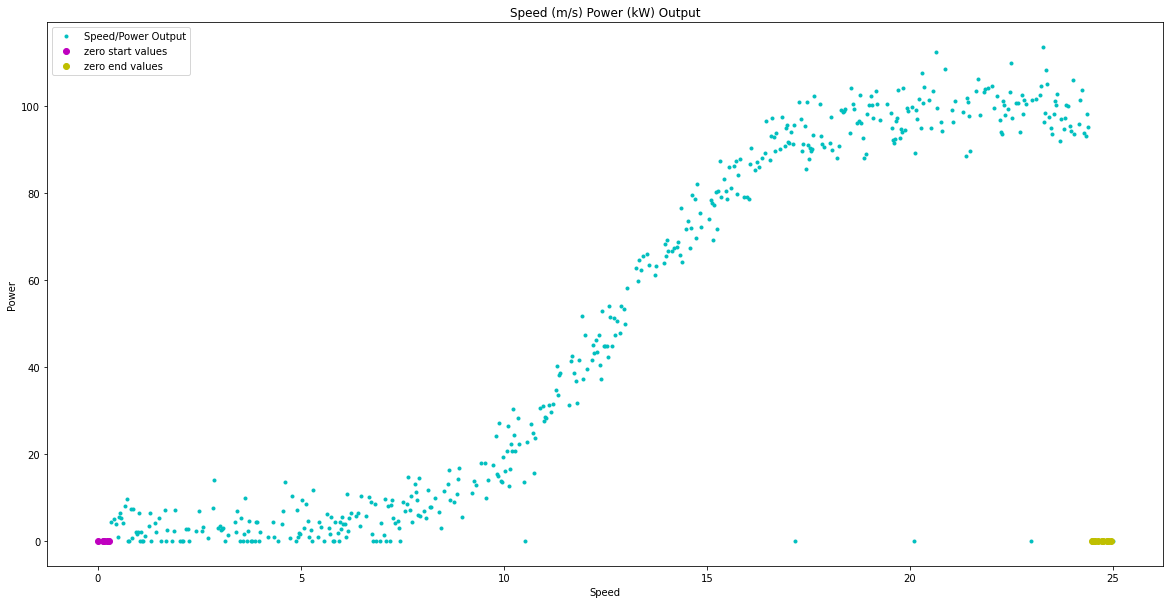

In [7]:
plt.plot(df['speed'] , df['power'] , 'c.', label = 'Speed/Power Output');
plt.plot(powerzerostart['speed'] , powerzerostart['power'] , 'mo', label = 'zero start values');
plt.plot(powerzeroend['speed'] , powerzeroend['power'] , 'yo', label = 'zero end values');
plt.xlabel('Speed');
plt.ylabel('Power');
plt.legend();

plt.title('Speed (m/s) Power (kW) Output');

In [8]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [9]:
powerprod = df[0:490]
powerprod

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [10]:
powerzeroend = df[490:499]
powerzeroend

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [11]:
plt.rcParams['figure.figsize'] = (20, 10)

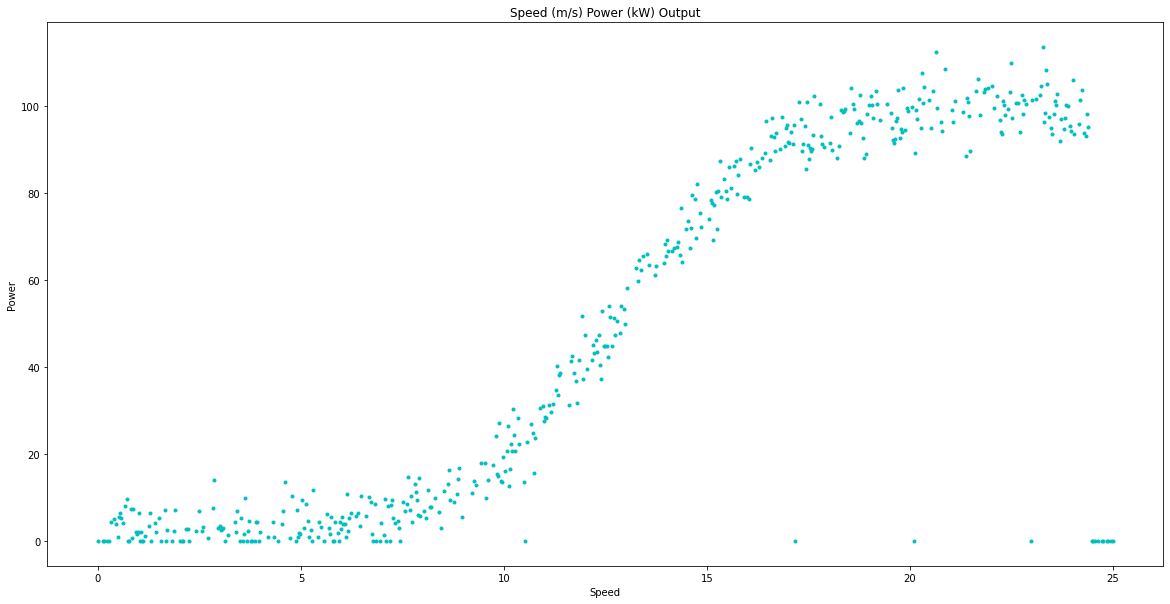

In [12]:
plt.plot(df['speed'] , df['power'] , 'c.');
plt.xlabel('Speed');
plt.ylabel('Power');

plt.title('Speed (m/s) Power (kW) Output');

In [13]:
coeffs = np.polyfit(df['speed'], df['power'], 1)
coeffs

array([  4.91759567, -13.89990263])

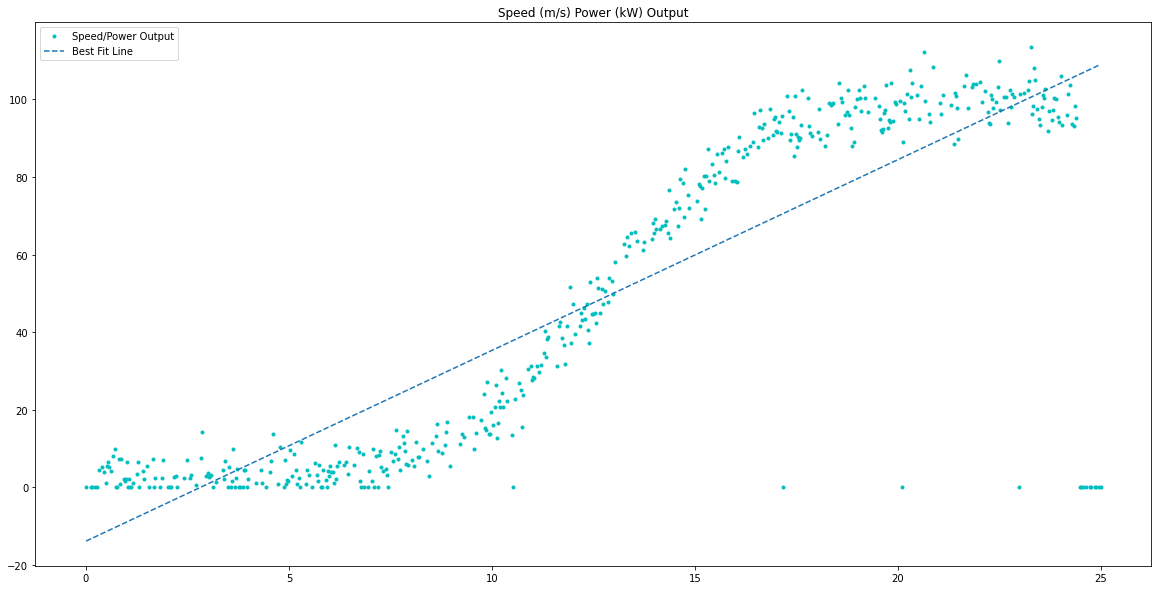

In [14]:
plt.plot(df['speed'], df['power'], 'c.', label='Speed/Power Output');

plt.plot(df['speed'], coeffs[0] * df['speed'] + coeffs[1], '--', label='Best Fit Line')
plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();

In [15]:
coeffs = np.polyfit(df['speed'], df['power'], 2)
coeffs

array([ -0.07021949,   6.67418543, -21.22684391])

In [16]:
x = df['speed']
y = coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]

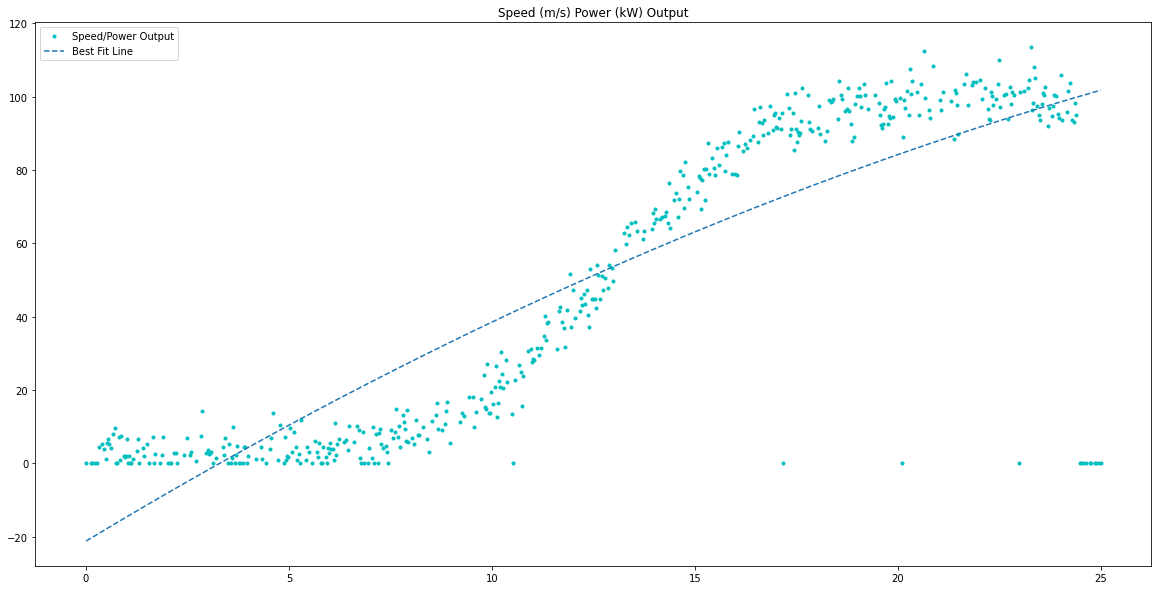

In [17]:
plt.plot(df['speed'], df['power'], 'c.', label='Speed/Power Output');


plt.plot(x, y, '--', label='Best Fit Line')
plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();

In [18]:
coeffs = np.polyfit(df['speed'], df['power'], 3)
coeffs

array([ -0.05241927,   1.89485751, -12.94285866,  19.20130246])

In [19]:
x = df['speed']
y = coeffs[0] * x**3 + coeffs[1] * x**2 + coeffs[2] * x + coeffs[3]

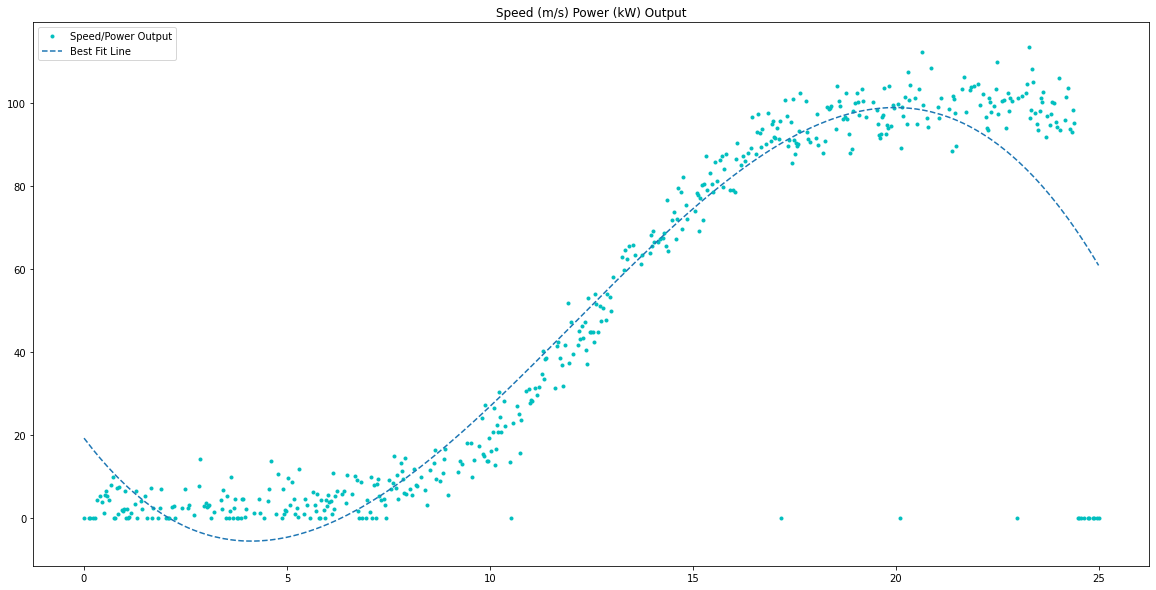

In [20]:
plt.plot(df['speed'], df['power'], 'c.', label='Speed/Power Output');


plt.plot(x, y, '--', label='Best Fit Line')
plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();

In [21]:
coeffs = np.polyfit(df['speed'], df['power'], 4)
coeffs

array([-2.91850218e-03,  9.31965285e-02, -4.33771545e-01, -1.66731072e-01,
        3.89358544e+00])

In [22]:
x = df['speed']
y = coeffs[0] * x**4 + coeffs[1] * x**3 + coeffs[2] * x**2 + coeffs[3] * x + coeffs[4]

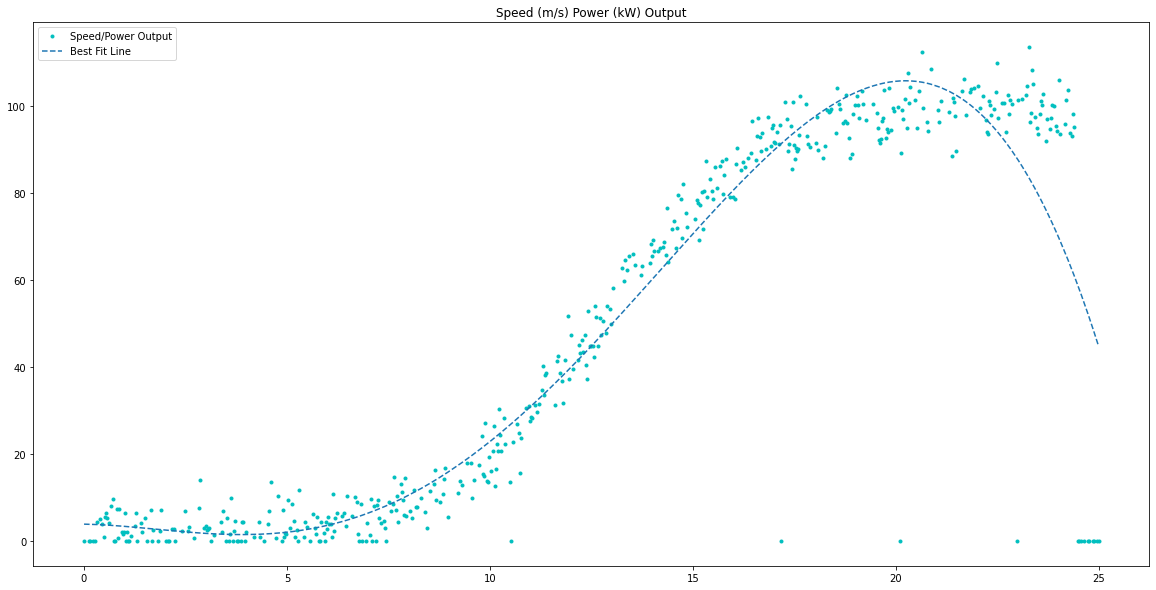

In [23]:
plt.plot(df['speed'], df['power'], 'c.', label='Speed/Power Output');


plt.plot(x, y, '--', label='Best Fit Line')
plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();

In [24]:
powerzeroend = df[490:501]

In [25]:
powerzeroend

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [26]:
powerprod = df[0:490]
powerprod

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


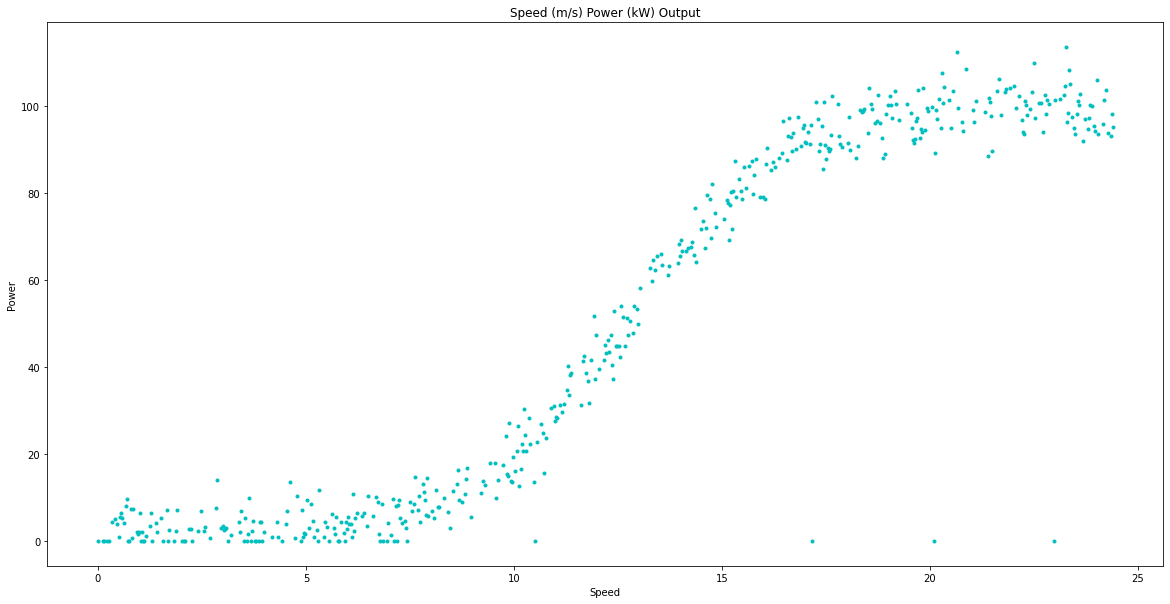

In [27]:
plt.plot(powerprod['speed'] , powerprod['power'] , 'c.');
plt.xlabel('Speed');
plt.ylabel('Power');

plt.title('Speed (m/s) Power (kW) Output');

In [28]:
coeffs = np.polyfit(powerprod['speed'], powerprod['power'], 4)
coeffs

array([-7.17487599e-04, -3.90374055e-03,  9.20567829e-01, -6.52413859e+00,
        1.01858911e+01])

In [29]:
x = powerprod['speed']
y = coeffs[0] * x**4 + coeffs[1] * x**3 + coeffs[2] * x**2 + coeffs[3] * x + coeffs[4]

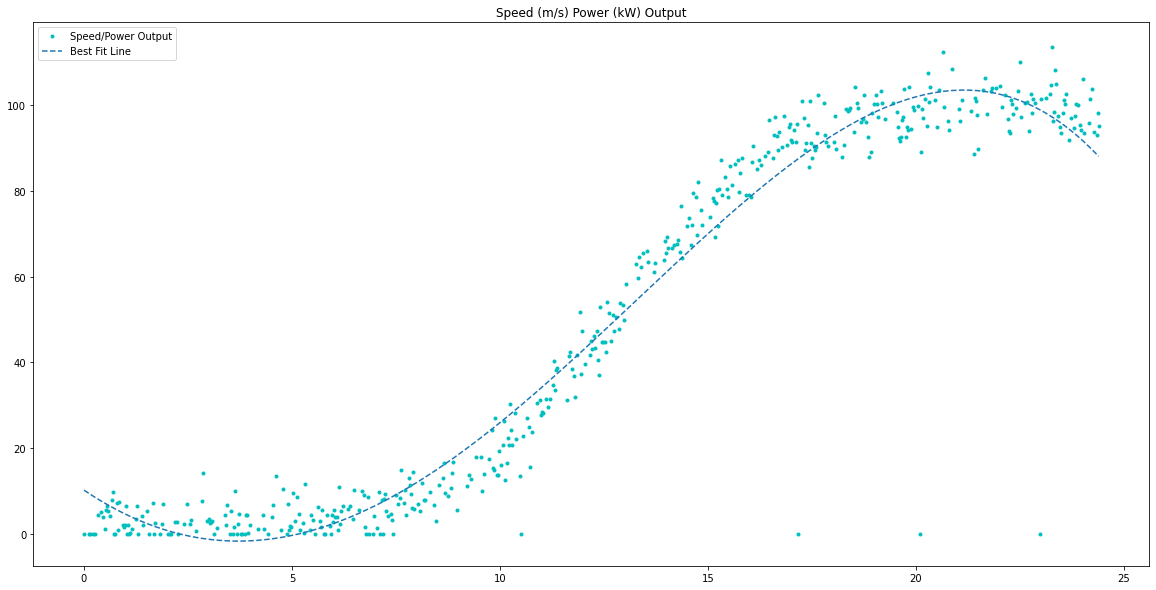

In [30]:
plt.plot(powerprod['speed'], powerprod['power'], 'c.', label='Speed/Power Output');


plt.plot(x, y, '--', label='Best Fit Line')
plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();